In [8]:
## setting up the notebook.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [9]:
## importing DataSet: 

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

## Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [15]:
#Crosstab Analysis

#Create a crosstab between the product category and the isBestSeller status.

import pandas as pd

x_cat_isb = pd.crosstab(df['category'], df['isBestSeller'])

#in order to better see the prevalence, working with a normalized & sortde crosstable: 
x_cat_isb_normalize = pd.crosstab(df['category'], df['isBestSeller'], normalize='all')
sorted_x_cat_isb = x_cat_isb.sort_values(by=True, ascending=False)
sorted_x_cat_isb.head(10)

isBestSeller,False,True
category,,
Grocery,0.003686,0.000228
Health & Personal Care,0.003690,0.000226
Baby,0.006019,0.000140
Sports & Outdoors,0.342084,0.000135
Power & Hand Tools,0.003418,0.000125
Beauty,0.007779,0.000124
Pet Supplies,0.003745,0.000117
Arts & Crafts,0.003814,0.000094
Women,0.007186,0.000087


#### Are there categories where being a best-seller is more prevalent?

Yes. 'Grocery' & 'Health & Personal Care" are the ones with more prevalence. One a lower extent, 5 other ones have more prevalence than the other.

## Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.



In [19]:
# Chi-Square test: 

x_cat_isb = pd.crosstab(df['category'], df['isBestSeller'])

from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(x_cat_isb)

chi2_statistic, chi2_p_value


(36540.20270061387, 0.0)

With a chi2_p_value of 0.0 which is <0.05 so this suggests that there is a significant association between categories and the fact to be a best seller.

In [20]:
from scipy.stats.contingency import association
association(x_cat_isb, method="cramer")

0.1222829439760564

The Cramér's V value of 0.148 suggests a weak association between the two variables

## Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

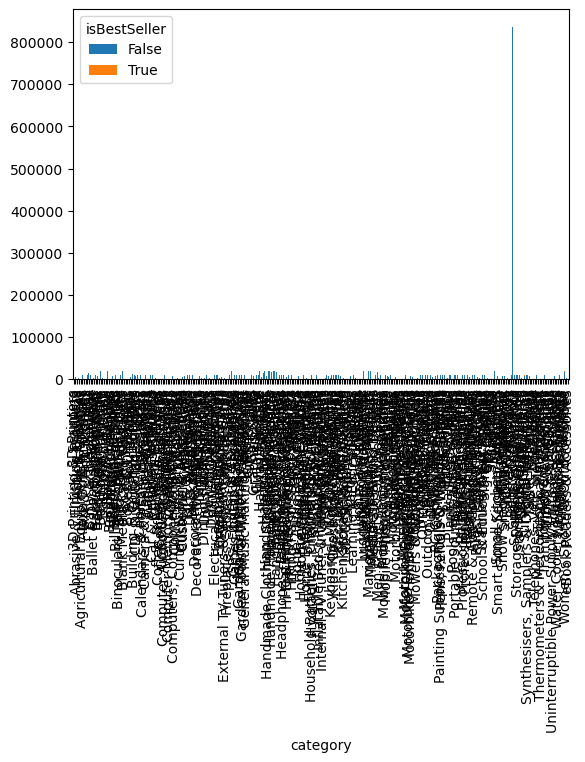

In [21]:

x_cat_isb.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

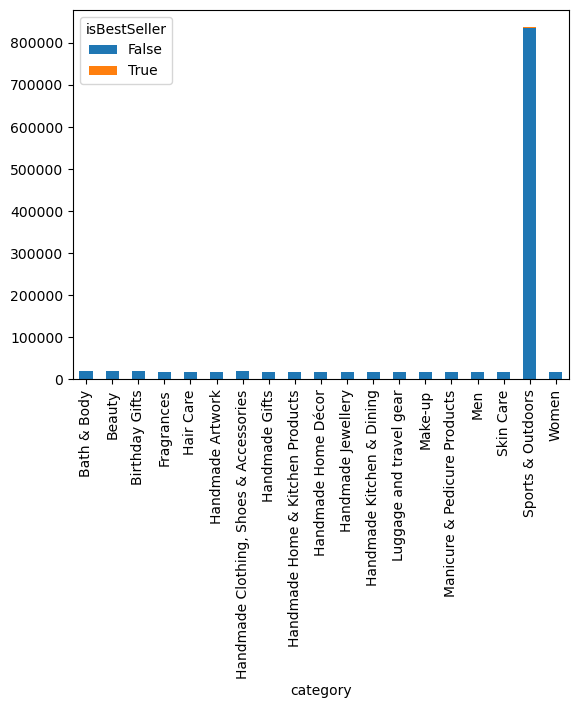

In [52]:
#Graph is not readeable, so let's only take the Top 20


category_counts = df['category'].value_counts()
sorted_categories = category_counts.sort_values(ascending=False)
top_20_categories = sorted_categories[:19]
filter_top_20 = df['category'].isin(top_20_categories.index)
filtered_df = df[filter_top_20]

x_cat_top20_isb = pd.crosstab(filtered_df['category'], filtered_df['isBestSeller'])


x_cat_top20_isb.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

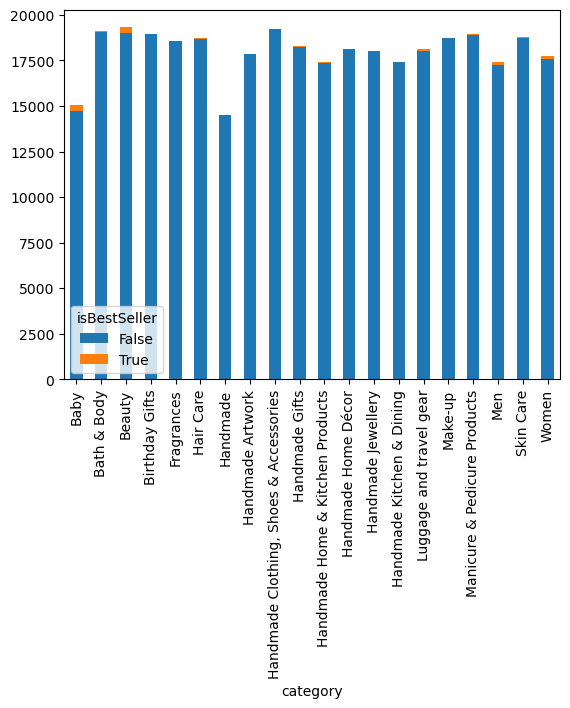

In [36]:
#Trying without the Sports Category to see if more readable:

top_20_categories_wo_sport = sorted_categories[1:21]
filter_top_20_wo_sport = df['category'].isin(top_20_categories.index)
filtered_df_wo_sport = df[filter_top_20_wo_sport]

x_cat_top20_wo_sport_isb = pd.crosstab(filtered_df_wo_sport['category'], filtered_df_wo_sport['isBestSeller'])


x_cat_top20_wo_sport_isb.plot(kind="bar", stacked=True)

Conclusion : even with that, the proportion of "isBestSeller" is not sufficiently important to be well visualized.

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

## Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [57]:
# Using the Function of the last Check for Undertanding for generating the dataframe wo price outliers:

def remove_outliers(df, columns_to_parse, outlier_strictness = 1.5):
    
    for c in columns_to_parse:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_strictness * IQR
        upper_bound = Q3 + outlier_strictness * IQR

        df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

    return df

df_copy = df.copy()
df_wo_price_outliers = remove_outliers(df_copy, ['price'])
df_wo_price_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


## 1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

In [71]:
#Generating the the filtered DF on the top20 categories: 

category_counts2 = df_wo_price_outliers['category'].value_counts()
sorted_categories2 = category_counts2.sort_values(ascending=False)
top_20_categories2 = sorted_categories2[:20]
filter_top_20_wo_price_outlier = df_wo_price_outliers['category'].isin(top_20_categories2.index)
filtered_df_top20_wo_outliers = df_wo_price_outliers[filter_top_20]

/var/folders/23/_tp55qhs10ggjbsw5jbjwvkm0000gn/T/ipykernel_29266/3405220669.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_top20_wo_outliers = df_wo_price_outliers[filter_top_20]


<Axes: xlabel='price', ylabel='category'>

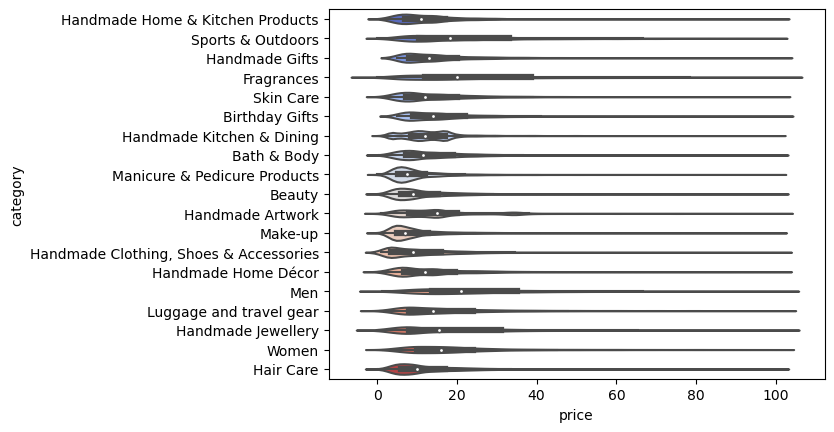

In [72]:
#Violin Plot: 

sns.violinplot(data=filtered_df_top20_wo_outliers, x='price', y='category', palette="coolwarm")

In [60]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

category_median_prices = df.groupby('category')['price'].median()
max_median_category = category_median_prices.idxmax()
print("Category with the maximum median price:", max_median_category)

Category with the maximum median price: Laptops




## 2. Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
.



In [70]:
# Creating the filtered DF with top10 categories

top_10_categories = sorted_categories[:10]
filter_top_10_wo_price_outlier = df_wo_price_outliers['category'].isin(top_10_categories.index)
filtered_df_top10_wo_outliers = df_wo_price_outliers[filter_top_10_wo_price_outlier]
filtered_df_top10_wo_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


<Axes: xlabel='price', ylabel='category'>

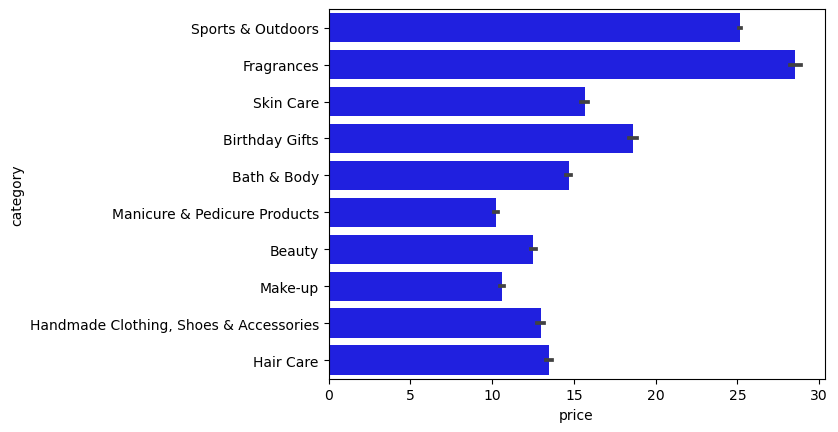

In [75]:
# creating the Bar Chart:

sns.barplot(data=filtered_df_top10_wo_outliers, y='category', x='price', color="blue",errorbar=None)

##### Which product category commands the highest average price? Don't filter here by top categories

In [73]:
category_avg_prices = df.groupby('category')['price'].mean()
max_mean_category = category_avg_prices.idxmax()
print("Category with the maximum average price:", max_mean_category)

Category with the maximum average price: Laptops


## 3. Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.


<Axes: xlabel='stars', ylabel='category'>

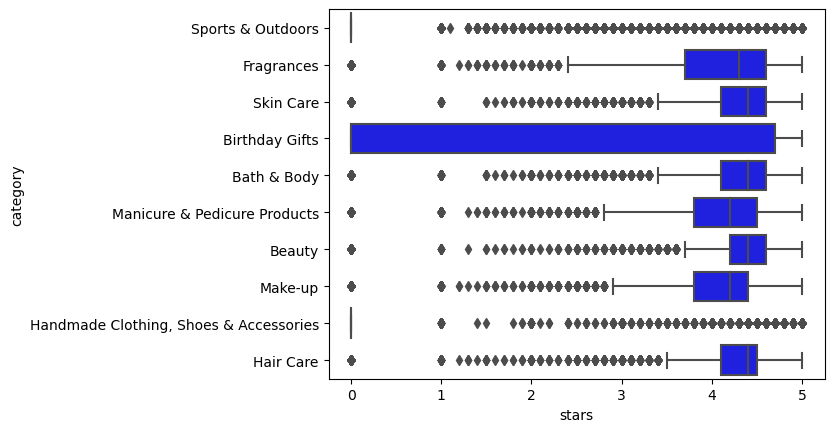

In [76]:
sns.boxplot(data=filtered_df_top10_wo_outliers, y='category', x='stars', color="blue")

##### Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [77]:
category_median_ratings = df.groupby('category')['stars'].median()
max_median_category_ratings = category_median_ratings.idxmax()
print("Category with the maximum median rating:", max_median_category_ratings)

Category with the maximum median rating: Computer Memory
